In [353]:
# -*- coding: utf-8 -*-
"""
File:   hw0.py
Author: 
Date:   
Desc:   
    
"""


""" =======================  Import dependencies ========================== """

import numpy as np
import matplotlib.pyplot as plt
import math

plt.close('all') #close any open plots

"""
===============================================================================
===============================================================================
============================ Question 1 =======================================
===============================================================================
===============================================================================
"""
""" ======================  Function definitions ========================== """

def plotData(x1,t1,x2=None,t2=None,x3=None,t3=None,legend=[]):
    '''plotData(x1,t1,x2,t2,x3=None,t3=None,legend=[]): Generate a plot of the 
       training data, the true function, and the estimated function'''
    p1 = plt.plot(x1, t1, 'bo') #plot training data
    if(x2 is not None):
        p2 = plt.plot(x2, t2, 'g') #plot true value
    if(x3 is not None):
        p3 = plt.plot(x3, t3, 'r') #plot training data

    #add title, legend and axes labels
    plt.ylabel('t') #label x and y axes
    plt.xlabel('x')
    
    if(x2 is None):
        plt.legend((p1[0]),legend)
    if(x3 is None):
        plt.legend((p1[0],p2[0]),legend)
    else:
        plt.legend((p1[0],p2[0],p3[0]),legend)
        
def fitdata_poly(x,t,M):
    X = np.array([x**m for m in range(M+1)]).T
    w = np.linalg.inv(X.T@X)@X.T@t
    return w

def findmeans(start,stop,steps):
    eq_spaced = np.linspace(start,stop,steps+1)
    means = []
    for j in range(0,steps):
        means.append(round(((eq_spaced[j] + eq_spaced[j+1])/2),4))
    return means

def testing(x,t,M):
    basis = np.zeros((len(x)))
    basis[:,1] = 1
    means = findmeans(-4,4,M)
    for row_index in range(M+1):
        basis[row_index +1] = np.array(np.exp((-1)*(((x) - means[row_index])**2)/(2*(.2)**2))).T
    basis = np.array(basis).T
    w = np.linalg.inv(basis.T@basis)@basis.T@t
    return w

def fitdata_rbf(x,t,M,s):
    N = len(x)
    means = findmeans(-4,4,M)
    X = np.zeros((M,N))
    for j in range(0,M):
        X[j] = np.exp( (-1)*( (x - means[j])**2 ) / (2*s**2) )
    bias = np.ones((1,N))
    X = np.concatenate((bias, X))
    X = X.T
    w = np.linalg.inv(X.T@X)@X.T@t
    return X, w

In [354]:
""" ======================  Variable Declaration ========================== """
# M = 7 #regression model order
k = 1 #Huber M-estimator tuning parameter

""" =======================  Load Training Data ======================= """
data_uniform = np.load('TrainData.npy')
x_training = data_uniform[:,0]
t_training = data_uniform[:,1]

x_sinc = np.arange(-4,4,.001)
t_sinc = np.sinc(x_sinc)

In [390]:
""" ========================  Train the Model ============================= """
"""This is where you call functions to train your model with different RBF kernels   """
## Polynomial Training
w_poly = fitdata_poly(x_training,t_training,9)
x_poly = np.arange(-3,3,0.001) #equally spaced points
X_poly = np.array([x_poly**m for m in range(w_poly.size)]).T
t_poly = X_poly@w_poly #predicted value

## Check best M for polynomial using RMSE
# Initialize variables
rmse_poly = np.zeros((len(x_training),1))
# Calculate RMSE across all M
for M in range(1,(len(x_training)+1)):
    w_poly_rmse = fitdata(x_training,t_training,M)
    #x_check = np.arange(-3,3,0.001) #equally spaced points
    X_poly_rmse = np.array([x_training**m for m in range(w_poly_rmse.size)]).T
    t_poly_rmse = X_poly_rmse@w_poly_rmse #predicted value
    inst_error_poly_rmse = (t_poly_rmse - t_training) #calculate instantaneous error
    rmse_poly[M-1,0] = math.sqrt((inst_error_poly_rmse.T@inst_error_poly_rmse)/len(x_training)) #calculate rmse
# Find order where RMSE is smallest
min_poly_rmse = rmse_poly.argmin() + 1

# RBF Training
[null,w_rbf] = fitdata_rbf(x_training,t_training,1,.7)
x_rbf = np.arange(-3,3,0.001) #equally spaced points
X_rbf = np.array([x_rbf**m for m in range(w_rbf.size)]).T
t_rbf = X_rbf@w_rbf #predicted value

## Check best M for RBF using RMSE
# Initialize variables
rmse_rbf = np.zeros((len(x_training),1))
# Calculate RMSE across all M
for M in range(1,(len(x_training)+1)):
    [X_rbf_rmse,w_rbf_rmse] = fitdata_rbf(x_training,t_training,M,.7)
    #x_check = np.arange(-3,3,0.001) #equally spaced points
    #X_rbf_rmse = np.array([x_training**m for m in range(w_poly_rmse.size)]).T
    t_rbf_rmse = X_rbf_rmse@w_rbf_rmse #predicted value
    inst_error_rbf_rmse = (t_rbf_rmse - t_training) #calculate instantaneous error
    rmse_rbf[M-1,0] = math.sqrt((inst_error_rbf_rmse.T@inst_error_rbf_rmse)/len(x_training)) #calculate rmse
# Find order where RMSE is smallest
min_rbf_rmse = rmse_rbf.argmin() + 1

In [382]:
""" ======================== Load Test Data  and Test the Model =========================== """

"""This is where you should load the testing data set. You shoud NOT re-train the model   """

data_test = np.load('TestData.npy')

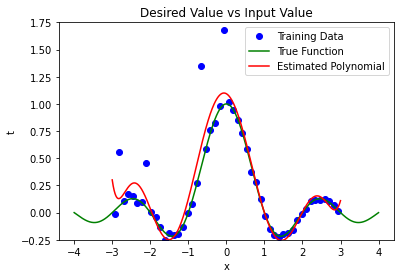

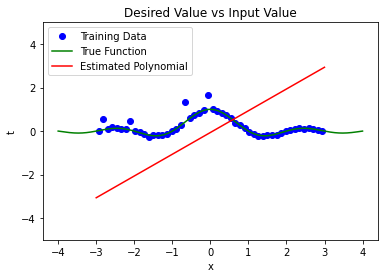

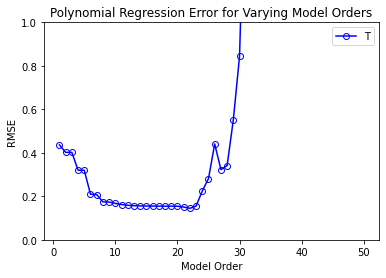

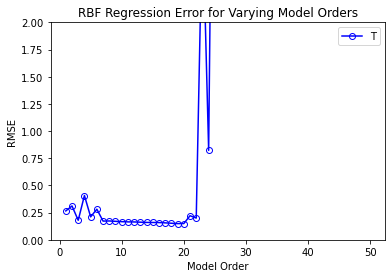

In [392]:
""" ========================  Plot Results ============================== """

""" This is where you should create the plots requested """
## Scatter plot -- Desired Value vs Input Value
plt.figure()
plotData(x1,t1,x_sinc,t_sinc,x_poly,t_poly,['Training Data','True Function','Estimated Polynomial'])
# plt.title("Desired Value vs Input Value: M= " + str(M))
plt.title("Desired Value vs Input Value")
plt.ylim(-0.25,1.75)

## Scatter plot -- Desired Value vs Input Value
plt.figure()
plotData(x1,t1,x_sinc,t_sinc,x_rbf,t_rbf,['Training Data','True Function','Estimated Polynomial'])
# plt.title("Desired Value vs Input Value: M= " + str(M))
plt.title("Desired Value vs Input Value")
plt.ylim(-5,5)

## Polynomial Regression Error for Varying Model Orders
plt.figure()
p1 = plt.plot(np.arange(1,len(x_training)+1),rmse_poly,marker='o', color='b', fillstyle='none')
plt.ylim(0,1)
plt.xlabel("Model Order")
plt.ylabel("RMSE")
plt.title("Polynomial Regression Error for Varying Model Orders")
plt.legend("Training Error")
plt.show()

## RBF Regression Error for Varying Model Orders
plt.figure()
p1 = plt.plot(np.arange(1,len(x_training)+1),rmse_rbf,marker='o', color='b', fillstyle='none')
plt.ylim(0,2)
plt.xlabel("Model Order")
plt.ylabel("RMSE")
plt.title("RBF Regression Error for Varying Model Orders")
plt.legend("Training Error")
plt.show()

In [322]:
#get_w(x_training,t_training,3,.2)

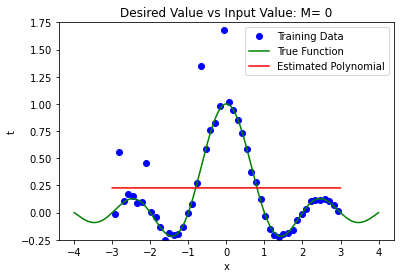

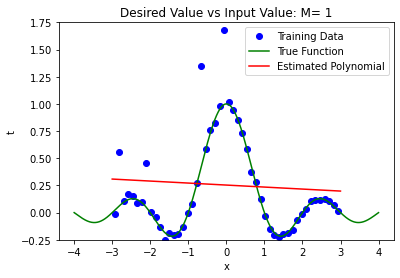

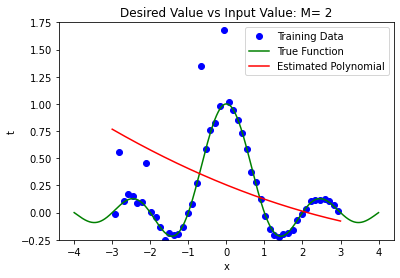

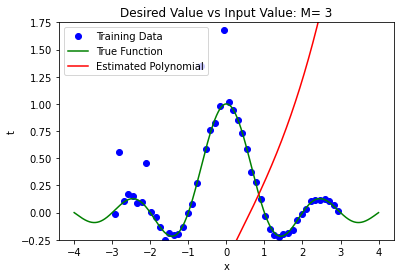

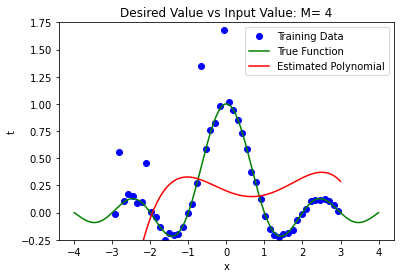

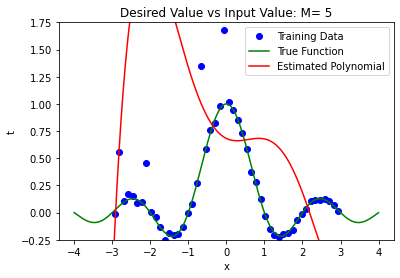

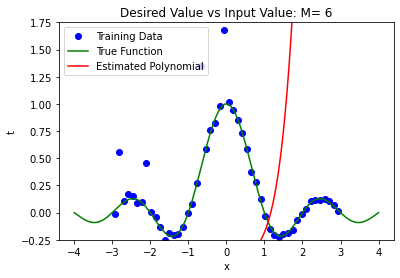

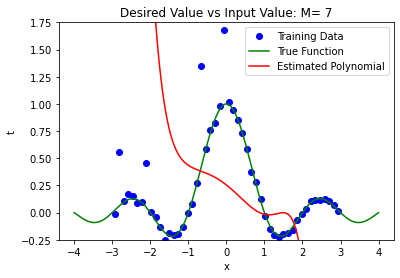

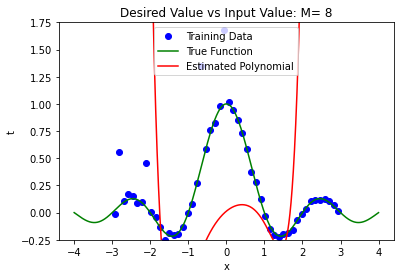

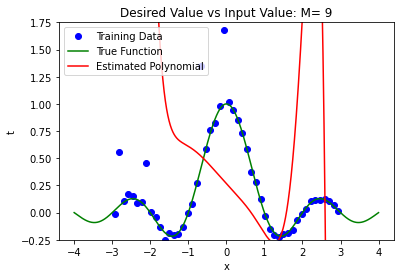

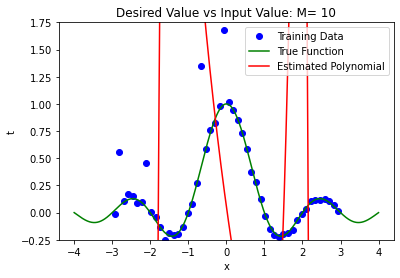

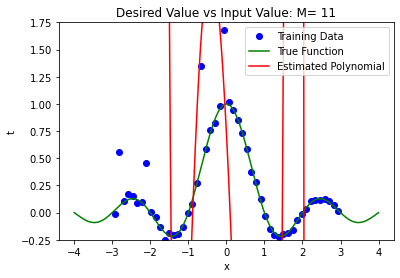

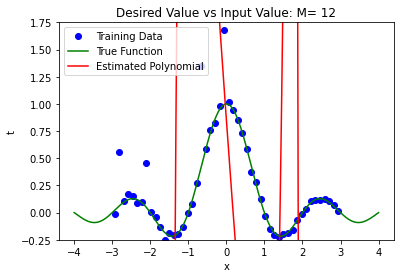

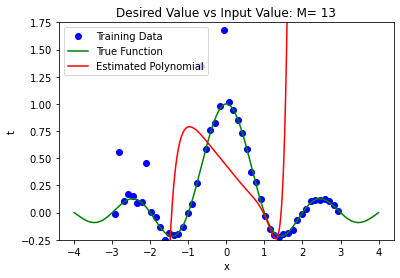

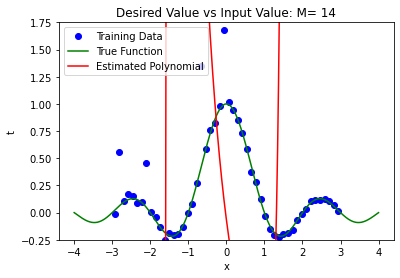

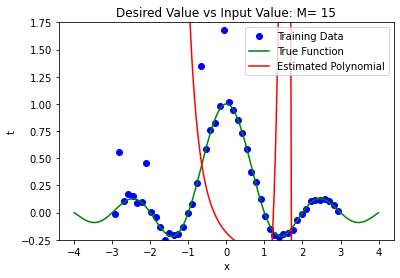

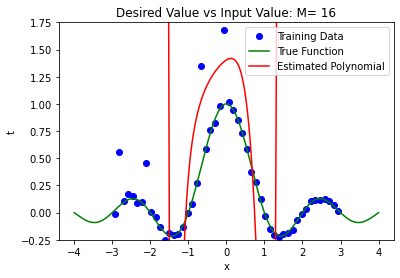

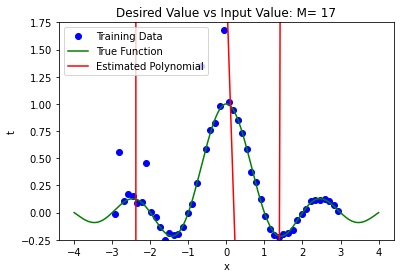

In [352]:
t_rbf

array([ 8.68455903e+14,  8.68166418e+14,  8.67876933e+14, ...,
       -8.67587448e+14, -8.67876933e+14, -8.68166418e+14])